In [129]:
from Bio import SeqIO

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

In [131]:
fasta_sequences = SeqIO.parse(open('ncrna.fa'),'fasta')
fasta_sequences

In [132]:
lst = []
for fasta in fasta_sequences:
    identification = fasta.id
    name = fasta.description
    bio_type = name.split(':')[7].split(" ")[0]
    if bio_type == 'miRNA':
        lst.append(identification)

In [133]:
df = pd.read_csv("kallisto.csv", index_col = 0)
mirnas = df[df['target_id'].isin(lst)]
mirnas = mirnas.reset_index().drop(["index"], axis = 1)
numeric_cols = [col for col in mirnas if mirnas[col].dtype.kind != 'O']
mirnas_padded = mirnas[numeric_cols] + 1

In [134]:
#mirnas_padded.to_csv("counts.csv")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab6a9cdfd0>]],
      dtype=object)

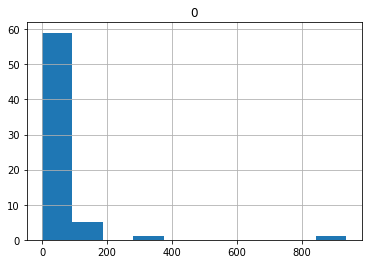

In [135]:
mirnas = mirnas.set_index(['target_id'])
mirnas = mirnas[(mirnas.T != 0).any()]
var = pd.DataFrame(mirnas.var(axis = 0))
var.hist()

In [136]:
mirnas = mirnas + 1

In [137]:
runs = pd.read_csv("Filtered_Runs.csv")
groups = pd.DataFrame(runs.groupby(['GROUP'])['Run'].apply(list).reset_index(name='new'))
ad = groups.loc[0, 'new']
ctl = groups.loc[1, 'new']
ads = mirnas[ad]
ctls = mirnas[ctl]

In [138]:
#ads.to_csv("ads.csv")
#ctls.to_csv("ctls.csv")

In [139]:
##Now we move onto post DESeq/Wilcox Stuff stuff

In [140]:
lfc = pd.read_csv("ordered.csv")
lfc = lfc[lfc['pvalue'] != 1]

In [141]:
deseq_lst = list(lfc['Unnamed: 0'].values)

In [142]:
wilcox_r = pd.read_csv("wilcox_r.csv", delim_whitespace=True)
wilcox_r['target_id'] = mirnas.reset_index()['target_id']
wilcox_r = wilcox_r.sort_values(['log2fold'])

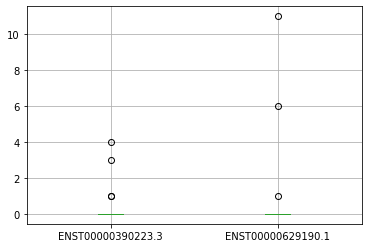

In [143]:
df = pd.read_csv("mirna_counts.csv", index_col = 0)
#Wilcox
#ENST00000619233.1 (Most Upregulated)
#ENST00000362251.4 (Most Downregulated)
wilcox_bp = df[(df['target_id'] == 'ENST00000619233.1') | (df['target_id'] == 'ENST00000362251.4')]
wilcox_bp = wilcox_bp.set_index(['target_id']).T

#DESeq
#ENST00000390223.3 (Most Upregulated)
#ENST00000629190.1 (Most Downregulated)
deseq_bp = df[(df['target_id'] == 'ENST00000390223.3') | (df['target_id'] == 'ENST00000629190.1')]
deseq_bp = deseq_bp.set_index(['target_id']).T

deseq_bp.boxplot()

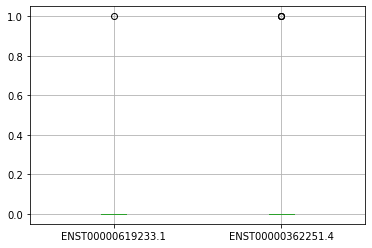

In [144]:
wilcox_bp.boxplot()

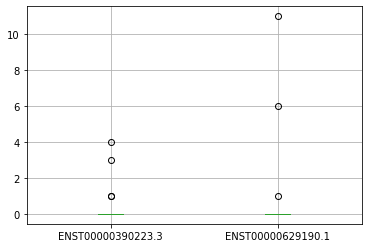

In [38]:
deseq_bp.boxplot()

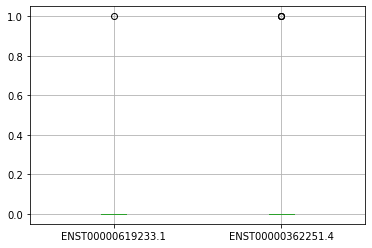

In [39]:
wilcox_bp.boxplot()